In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('CarPrice.csv')

# Data preprocessing

In [3]:
data.dropna(inplace=True)

In [4]:
data.drop_duplicates(inplace=True)

# Feature engineering

In [5]:
data['CarBrand'] = data['CarName'].apply(lambda x: x.split()[0])
data.drop('CarName', axis=1, inplace=True)

In [6]:
label_encoder = LabelEncoder()
data['fueltype'] = label_encoder.fit_transform(data['fueltype'])
data['aspiration'] = label_encoder.fit_transform(data['aspiration'])
data['doornumber'] = label_encoder.fit_transform(data['doornumber'])
data['carbody'] = label_encoder.fit_transform(data['carbody'])
data['drivewheel'] = label_encoder.fit_transform(data['drivewheel'])
data['enginelocation'] = label_encoder.fit_transform(data['enginelocation'])
data['enginetype'] = label_encoder.fit_transform(data['enginetype'])
data['cylindernumber'] = label_encoder.fit_transform(data['cylindernumber'])
data['fuelsystem'] = label_encoder.fit_transform(data['fuelsystem'])
data['CarBrand'] = label_encoder.fit_transform(data['CarBrand'])

# Splitting the data

In [7]:
X = data.drop('price', axis=1)  # Features
y = data['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training with XGBoost

In [9]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

# Model evaluation

In [10]:
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5835704.748973153
Root Mean Squared Error: 2415.720337492143
R-squared: 0.9260779387223118


# Actual price vs predicted price visualization

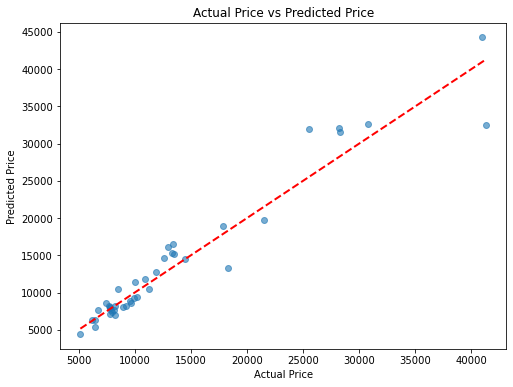

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

# Feature importance

In [12]:
feature_importance = xgb_model.feature_importances_
feature_names = X_train.columns

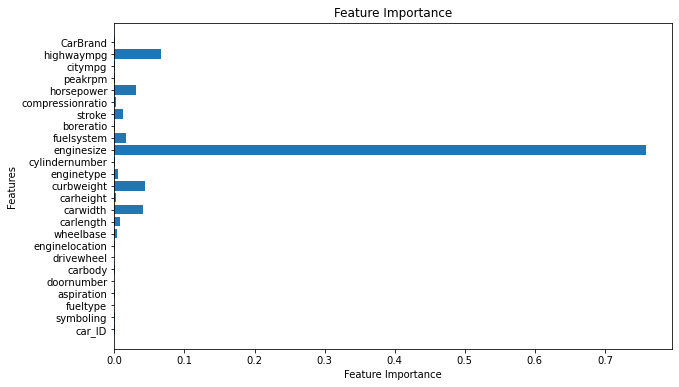

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Save the predicted values

In [16]:
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
predictions_df.to_csv('CarPricePredictions.csv', index=False)